In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

In [9]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [21]:
df.columns.sort_values()

Index(['Age', 'Age1stCode', 'BetterLife', 'BlockchainIs', 'BlockchainOrg',
       'CareerSat', 'CodeRev', 'CodeRevHrs', 'CompFreq', 'CompTotal',
       'Containers', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'Dependents', 'DevEnviron', 'DevType', 'EdLevel', 'EduOther',
       'Employment', 'EntTeams', 'Ethnicity', 'Extraversion', 'FizzBuzz',
       'Gender', 'Hobbyist', 'ITperson', 'ImpSyn', 'JobFactors', 'JobSat',
       'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'LastHireDate', 'LastInt', 'MainBranch', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'OffOn',
       'OpSys', 'OpenSource', 'OpenSourcer', 'OrgSize',
       'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseHow',
       'PurchaseWhat', 'Respondent', 'ResumeUpdate', 'SOAccount', 'SOComm',
       'SOFindAnswer', 'SOHowMuchTime', 'SOJobs', 'SONewContent', 'SOPartFreq',
    

Question 1

In [52]:
df.sort_values(by=['Country', 'ConvertedComp'], ascending=[True, False], inplace=True)
largestComp = df[['ConvertedComp', 'Respondent']].head(10)

In [53]:
largestComp

,ConvertedComp,Respondent
62723,1000000.0,63129
50172,153216.0,50499
39018,19152.0,39258
58082,17556.0,58450
7056,14364.0,7085
22327,7980.0,22450
48122,4464.0,48436
10697,3996.0,10746
8112,1596.0,8149
29560,1116.0,29736


In [79]:
values = largestComp['ConvertedComp'].iloc[5:10]
labels = [x for x in range(5)]
labels
values

22327    7980.0
48122    4464.0
10697    3996.0
8112     1596.0
29560    1116.0
Name: ConvertedComp, dtype: float64

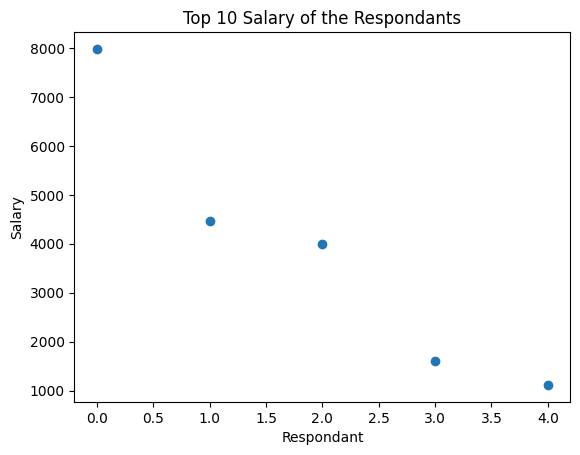

In [80]:
plt.scatter(labels, values)
plt.xlabel('Respondant')
plt.ylabel('Salary')
plt.title('Top 10 Salary of the Respondants')
plt.show()

Question 2

In [291]:
def countlangtop(series):  
    series = series.str.split(';')
    List = []
    for x in series.dropna():
        List.extend(x)
    return pd.Series(List).value_counts().sort_values(ascending=False).index[0]
def countlang(series):  
    series = series.str.split(';')
    List = []
    for x in series.dropna():
        List.extend(x)
    return pd.Series(List).value_counts().sort_values(ascending=False)

The most popular language among developers is javascript

In [292]:
grp = df.groupby(['EdLevel'])
popularlan = grp['LanguageWorkedWith'].apply(countlang)
popularlan

EdLevel                                                            
Associate degree                                        JavaScript     2200
                                                        HTML/CSS       2163
                                                        SQL            1755
                                                        C#             1168
                                                        Java           1064
                                                                       ... 
Some college/university study without earning a degree  Elixir          213
                                                        Clojure         176
                                                        WebAssembly     168
                                                        Erlang          131
                                                        F#              122
Name: LanguageWorkedWith, Length: 252, dtype: int64

The most popular language among different education levels

In [295]:
bach = popularlan[["Bachelor’s degree (BA, BS, B.Eng., etc.)"]]

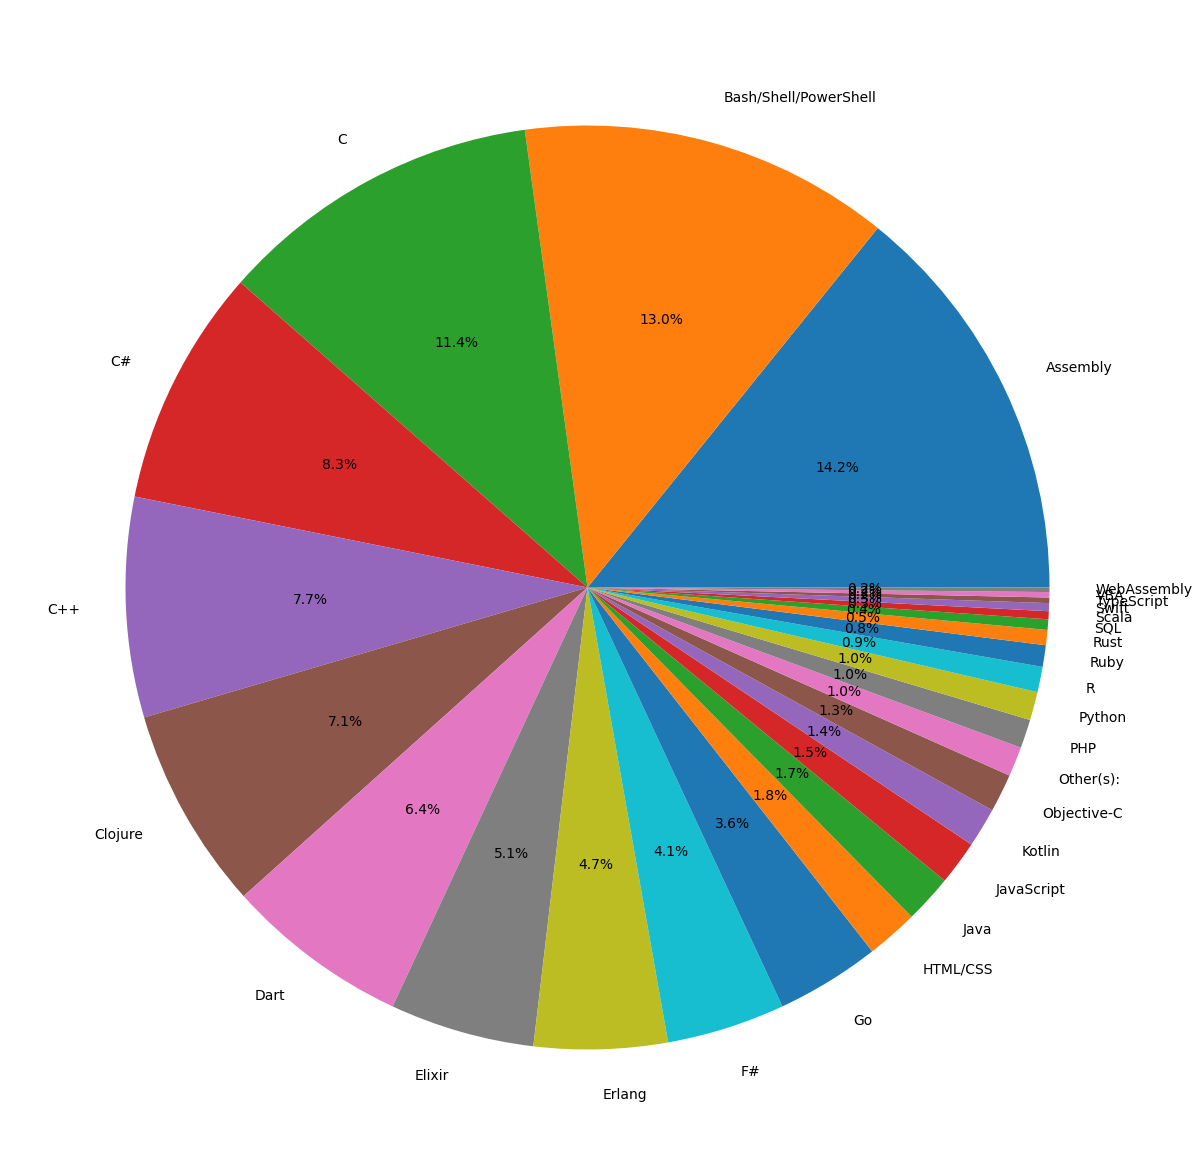

In [296]:
plt.pie(bach, labels=bach.index.levels[1], autopct='%1.1f%%')
plt.show()

It show the most most used languages in terms of percentages for Bachelor

Question 3

In [227]:
df.columns.sort_values()

Index(['Age', 'Age1stCode', 'BetterLife', 'BlockchainIs', 'BlockchainOrg',
       'CareerSat', 'CodeRev', 'CodeRevHrs', 'CompFreq', 'CompTotal',
       'Containers', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'Dependents', 'DevEnviron', 'DevType', 'EdLevel', 'EduOther',
       'Employment', 'EntTeams', 'Ethnicity', 'Extraversion', 'FizzBuzz',
       'Gender', 'Hobbyist', 'ITperson', 'ImpSyn', 'JobFactors', 'JobSat',
       'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'LastHireDate', 'LastInt', 'MainBranch', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'OffOn',
       'OpSys', 'OpenSource', 'OpenSourcer', 'OrgSize',
       'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseHow',
       'PurchaseWhat', 'Respondent', 'ResumeUpdate', 'SOAccount', 'SOComm',
       'SOFindAnswer', 'SOHowMuchTime', 'SOJobs', 'SONewContent', 'SOPartFreq',
    

In [297]:
filt = ((df['Gender'] == 'Woman') & (df['ConvertedComp'] > 5000))
filteredDf = df[filt]
# filt = filteredDf['Country'] == 'China'
# # finalDf = filteredDf[filt]
# # finalDf
filteredDf = filteredDf[filteredDf['Country'] == 'China']
filteredDf.count()

Respondent                15
MainBranch                15
Hobbyist                  15
OpenSourcer               15
OpenSource                14
Employment                14
Country                   15
Student                   13
EdLevel                   14
UndergradMajor            13
EduOther                  15
OrgSize                   13
DevType                   14
YearsCode                 15
Age1stCode                15
YearsCodePro              15
CareerSat                 15
JobSat                    15
MgrIdiot                  14
MgrMoney                  14
MgrWant                   14
JobSeek                   15
LastHireDate              15
LastInt                   13
FizzBuzz                  15
JobFactors                15
ResumeUpdate              15
CurrencySymbol            15
CurrencyDesc              15
CompTotal                 15
CompFreq                  15
ConvertedComp             15
WorkWeekHrs               15
WorkPlan                  15
WorkChallenge 

In [298]:
langwoman = countlang(filteredDf['LanguageWorkedWith'])
langwoman

Java                     9
Python                   7
JavaScript               5
SQL                      4
TypeScript               4
HTML/CSS                 3
R                        2
Scala                    2
C#                       2
C                        2
Bash/Shell/PowerShell    2
PHP                      2
Objective-C              2
C++                      1
Kotlin                   1
Swift                    1
Assembly                 1
Ruby                     1
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

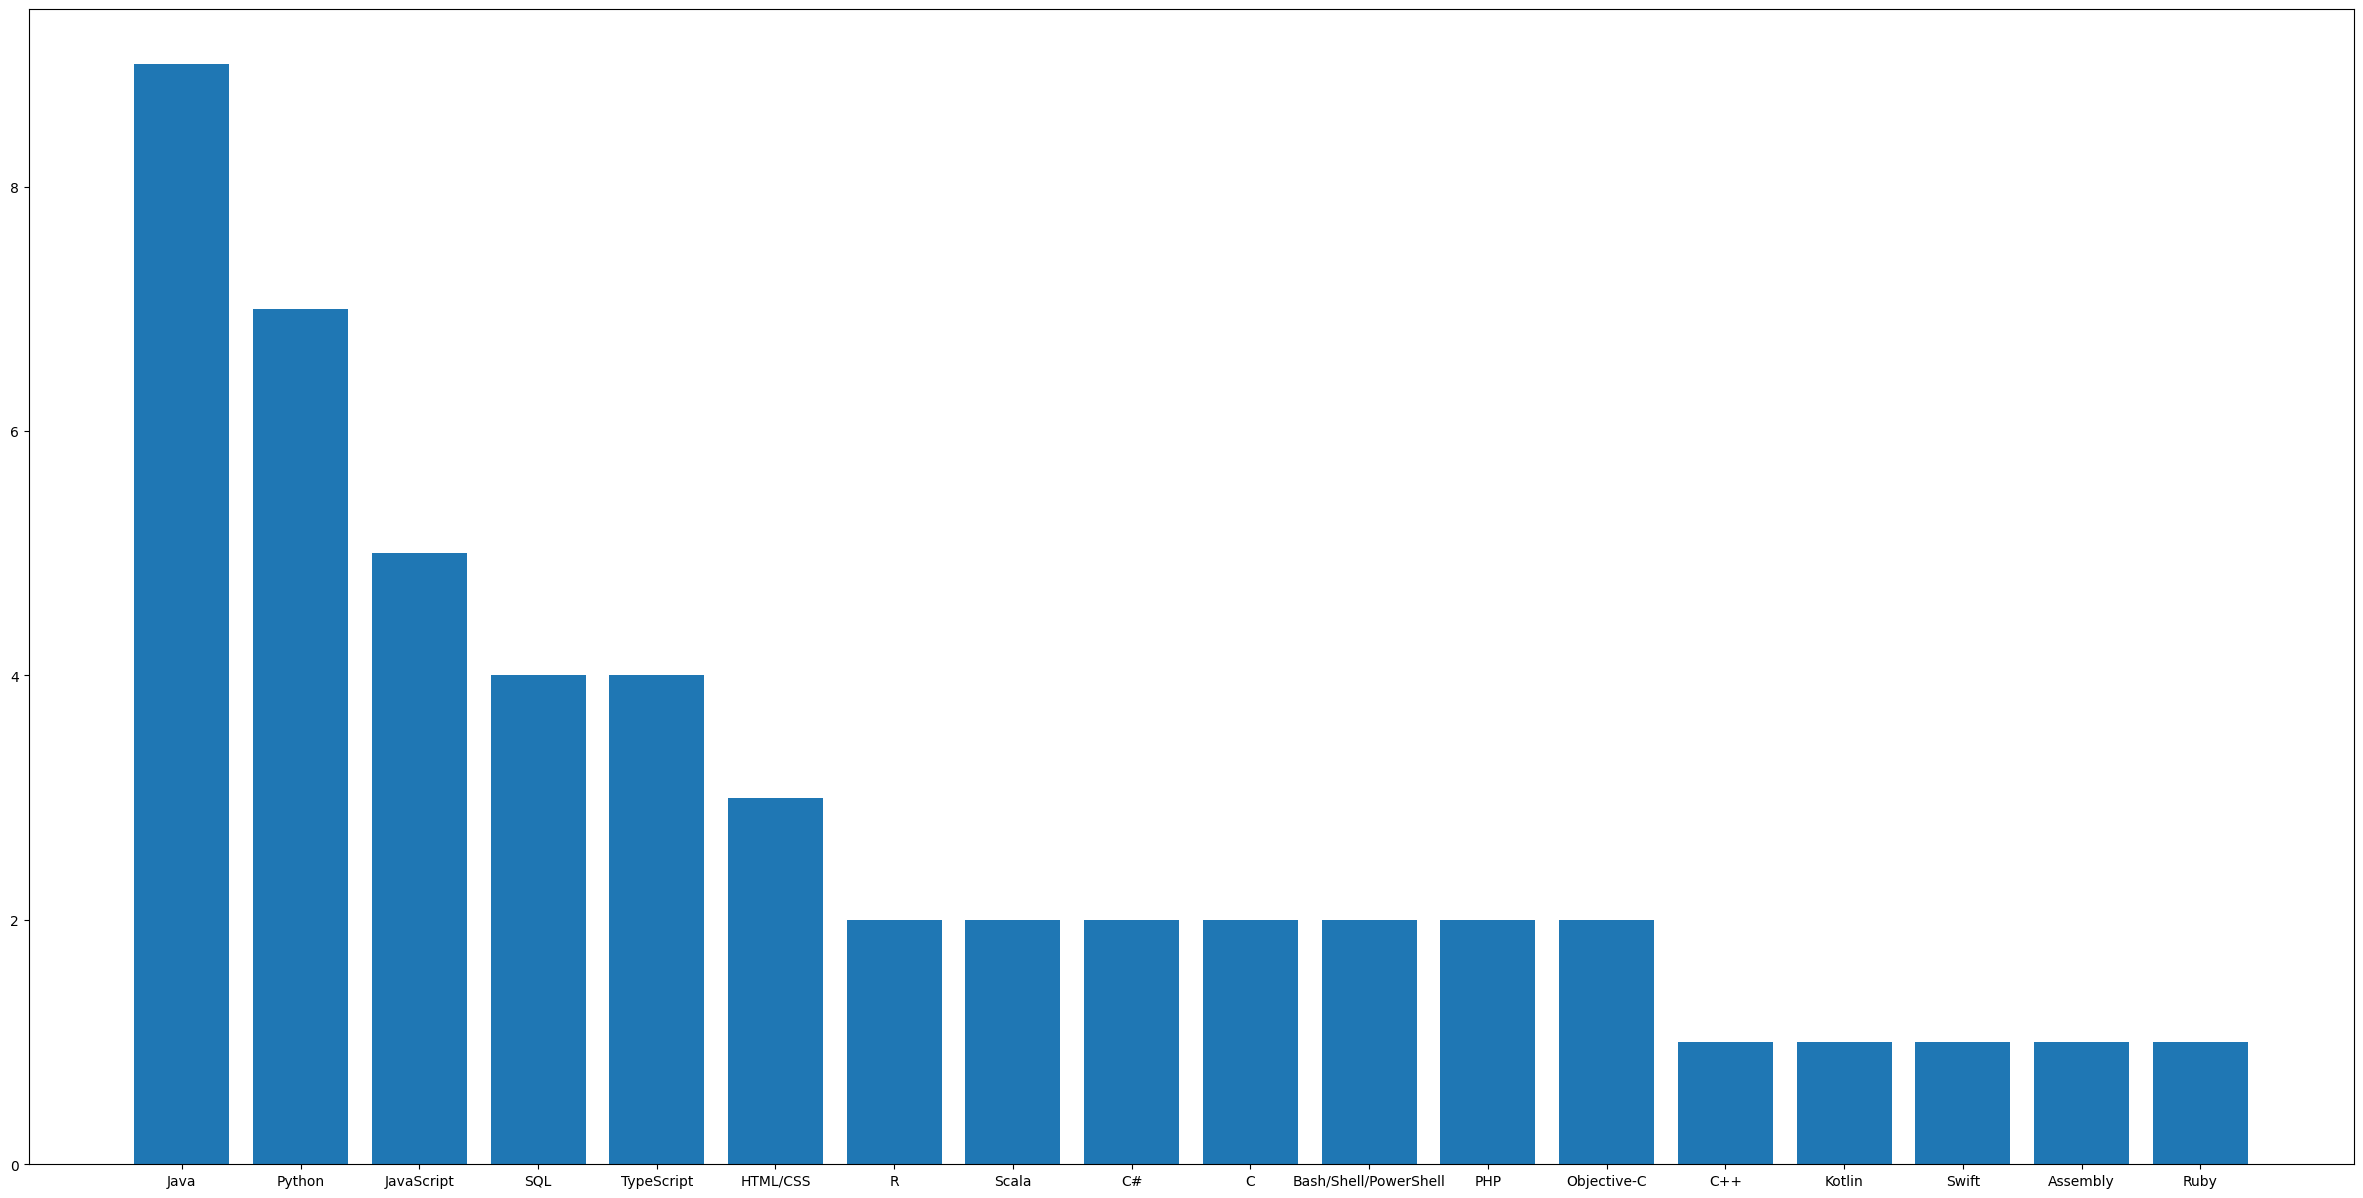

In [299]:
plt.rcParams["figure.figsize"] = (30, 15)
plt.bar(langwoman.index, langwoman)
plt.show

This bar graph show the number of woman of have worked with the each of the languages.

In [313]:
filt = df['Gender'] == 'Woman'
grp = df[filt].groupby('Country')

In [329]:
def helper(series):
    return ((series.str.contains('Python').sum()) / series.fillna('').count()) * 100

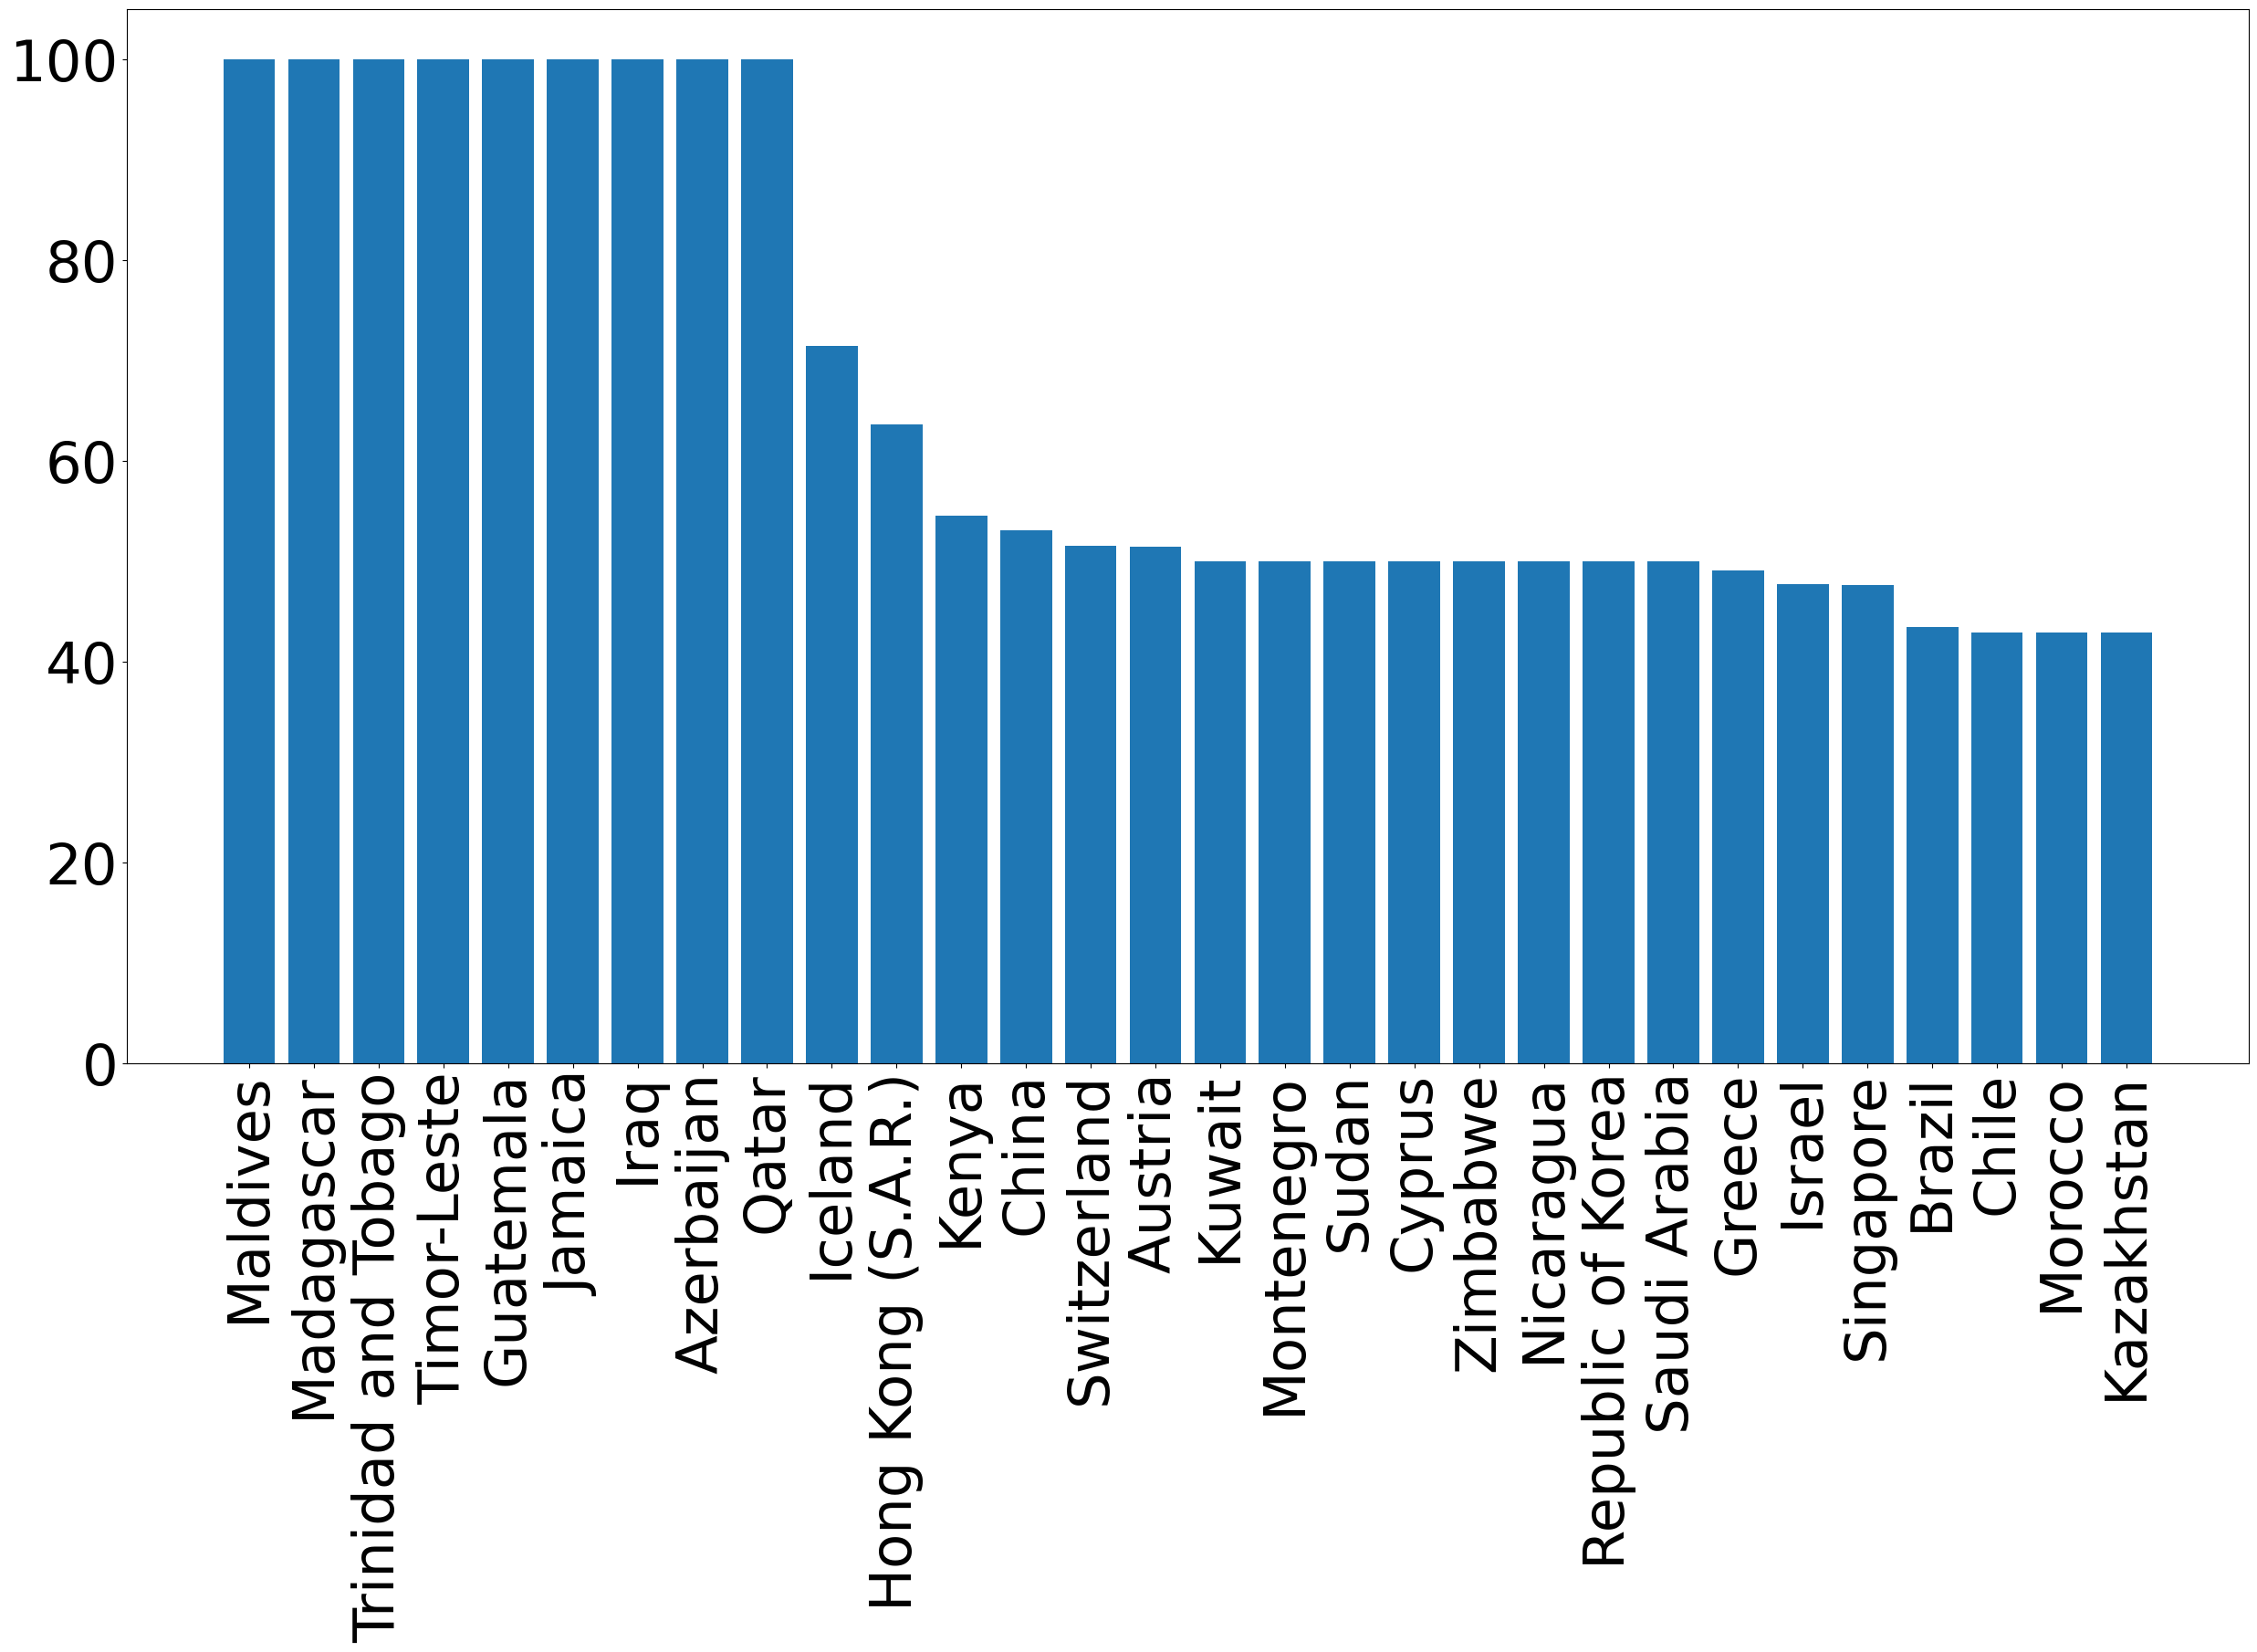

In [343]:
pythondev = grp['LanguageWorkedWith'].apply(helper).sort_values(ascending=False).head(30)
plt.bar(pythondev.index, pythondev)
plt.rcParams.update({'font.size': 20})
plt.xticks(rotation = 90,)
plt.show()

Percentage of woman devs who use python in each country

Question 4

In [379]:
tempdf = grp['WorkWeekHrs'].agg([lambda x: x.fillna('').count(), 'mean'])
tempdf

,<lambda_0>,mean
Country,,
Afghanistan,2,100.50
Albania,12,46.50
Algeria,12,46.25
Andorra,1,NaN
Angola,1,NaN
...,...,...
Uzbekistan,1,35.00
"Venezuela, Bolivarian Republic of...",1,40.00
Viet Nam,12,84.00


In [380]:
tempdf.rename(columns = {'<lambda_0>': 'Total Respondants'}, inplace=True)
tempdf = tempdf.reindex(['mean', 'Total Respondants'], axis=1)

In [398]:
tempdf = tempdf[tempdf['Total Respondants'] > 250].sort_values('mean', ascending=False)

In [399]:
tempdf

,mean,Total Respondants
Country,,
India,53.596439,570
United States,40.846338,2092
Germany,38.816038,296
Canada,38.314252,311
United Kingdom,37.848485,426


<function matplotlib.pyplot.show(close=None, block=None)>

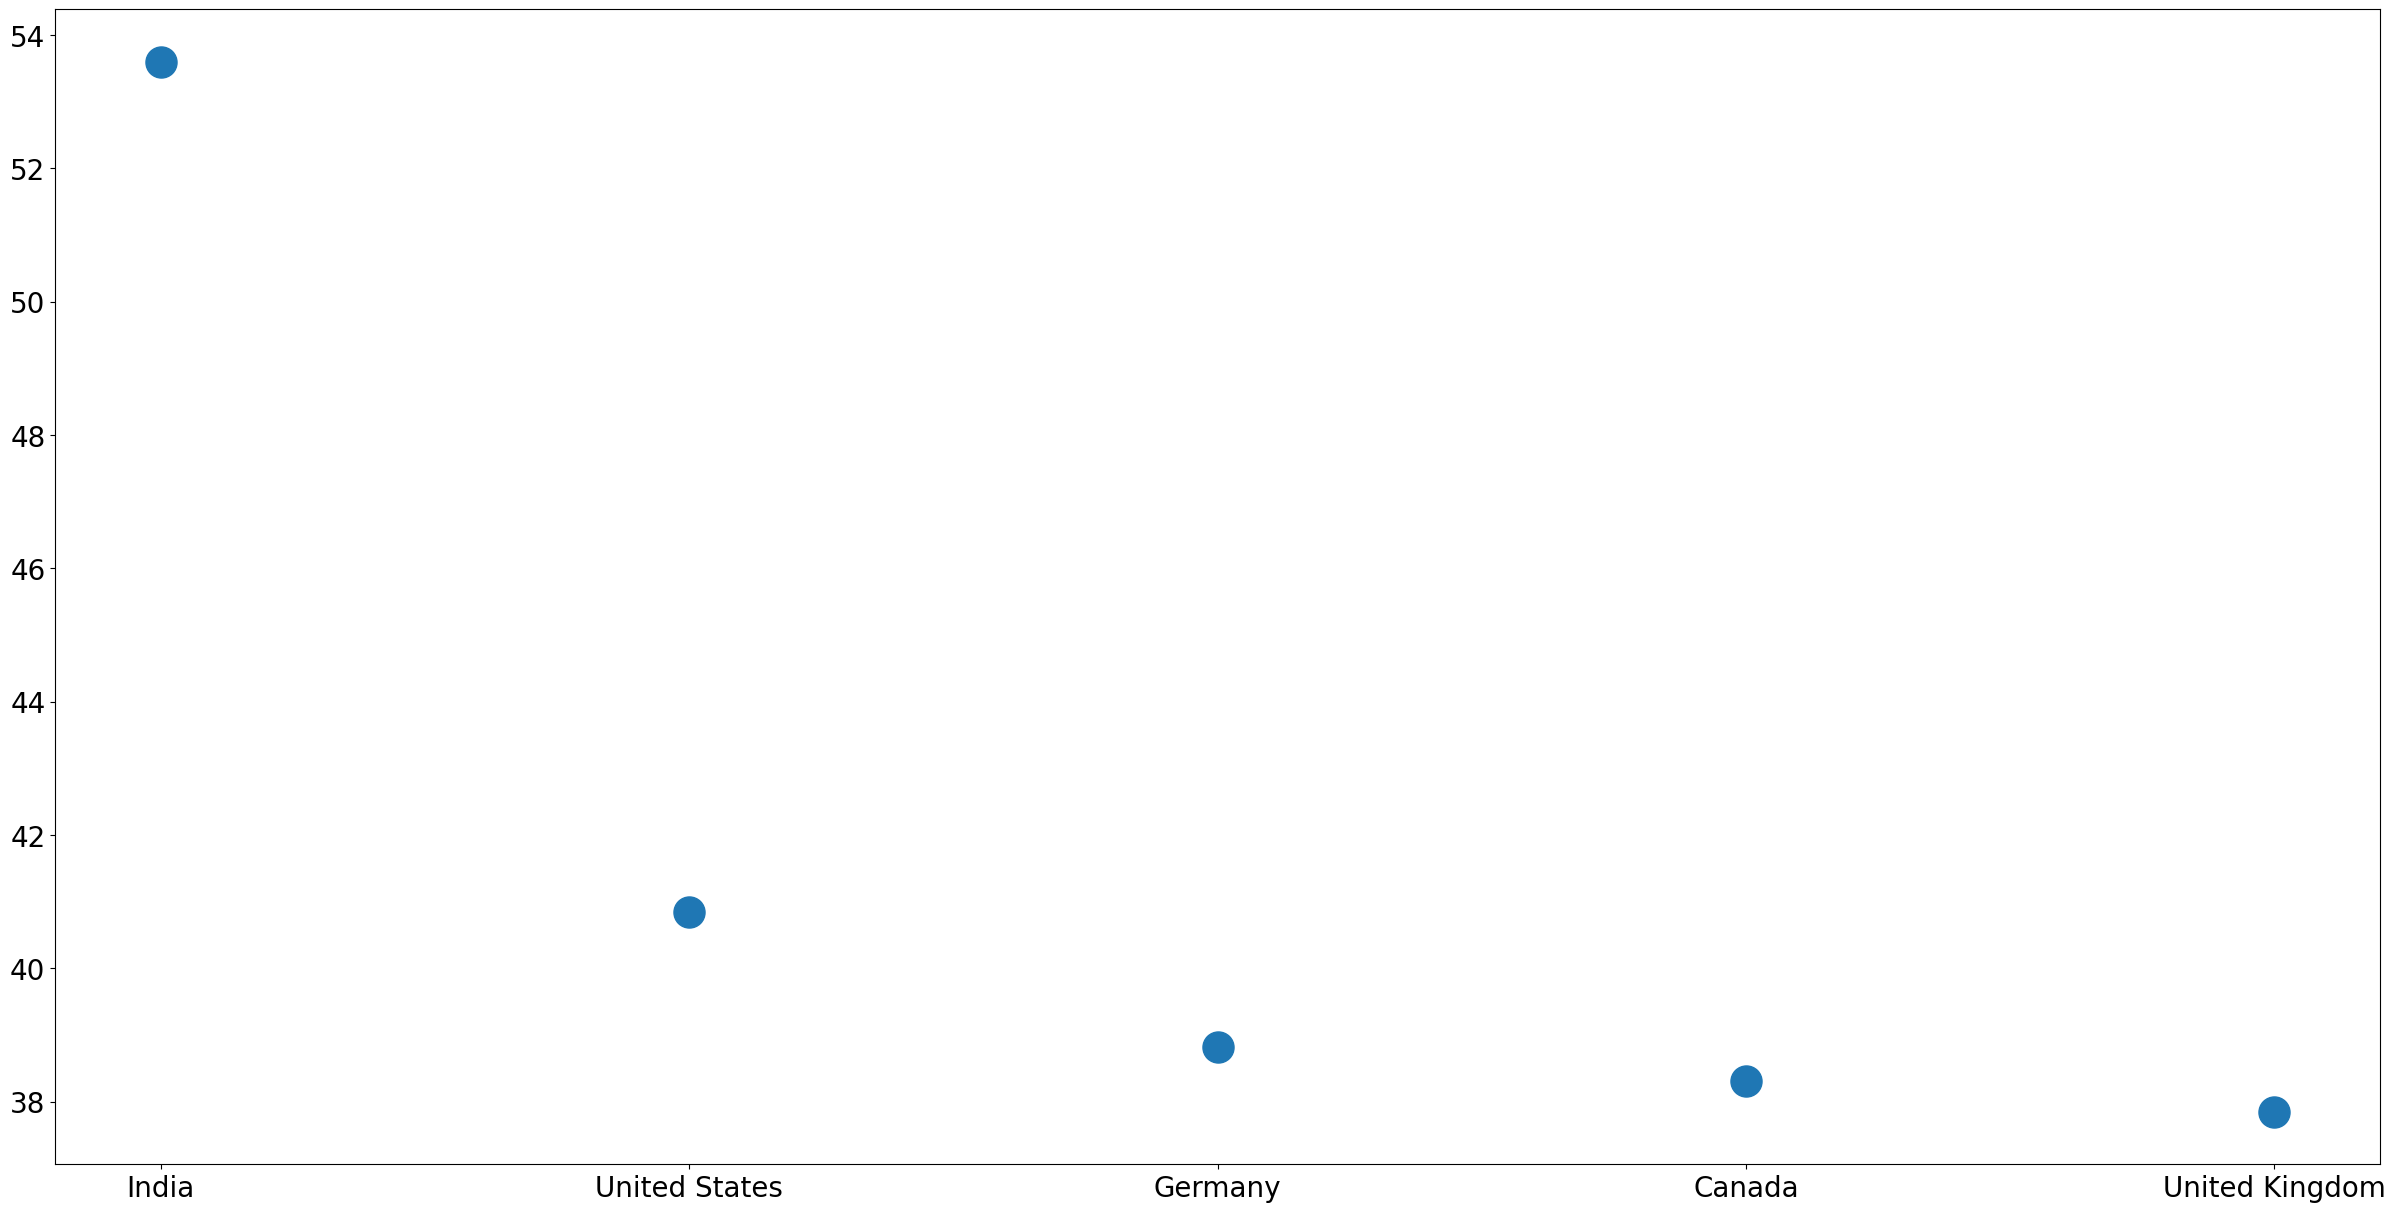

In [400]:
plt.scatter(tempdf.index, tempdf['mean'], s=500)
plt.show

It show the counteries and their mean weekly hours worked starting by the highest

Question 5

In [410]:
df[['Employment']].value_counts()


Index(['Age', 'Age1stCode', 'BetterLife', 'BlockchainIs', 'BlockchainOrg',
       'CareerSat', 'CodeRev', 'CodeRevHrs', 'CompFreq', 'CompTotal',
       'Containers', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'Dependents', 'DevEnviron', 'DevType', 'EdLevel', 'EduOther',
       'Employment', 'EntTeams', 'Ethnicity', 'Extraversion', 'FizzBuzz',
       'Gender', 'Hobbyist', 'ITperson', 'ImpSyn', 'JobFactors', 'JobSat',
       'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'LastHireDate', 'LastInt', 'MainBranch', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'OffOn',
       'OpSys', 'OpenSource', 'OpenSourcer', 'OrgSize',
       'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseHow',
       'PurchaseWhat', 'Respondent', 'ResumeUpdate', 'SOAccount', 'SOComm',
       'SOFindAnswer', 'SOHowMuchTime', 'SOJobs', 'SONewContent', 'SOPartFreq',
    

In [434]:
fulltime = df[(df['Employment'] == 'Employed full-time') & (df['WorkWeekHrs'] < 200)]
freelancer = df[(df['Employment'] == 'Independent contractor, freelancer, or self-employed') & (df['WorkWeekHrs'] < 200)]

In [435]:
fulltime = fulltime['WorkWeekHrs'].describe()

In [439]:
fulltime[0]

56040.0

In [436]:
freelancer = freelancer['WorkWeekHrs'].describe()
freelancer

count    5671.000000
mean       40.828510
std        18.935021
min         1.000000
25%        32.000000
50%        40.000000
75%        45.000000
max       168.000000
Name: WorkWeekHrs, dtype: float64

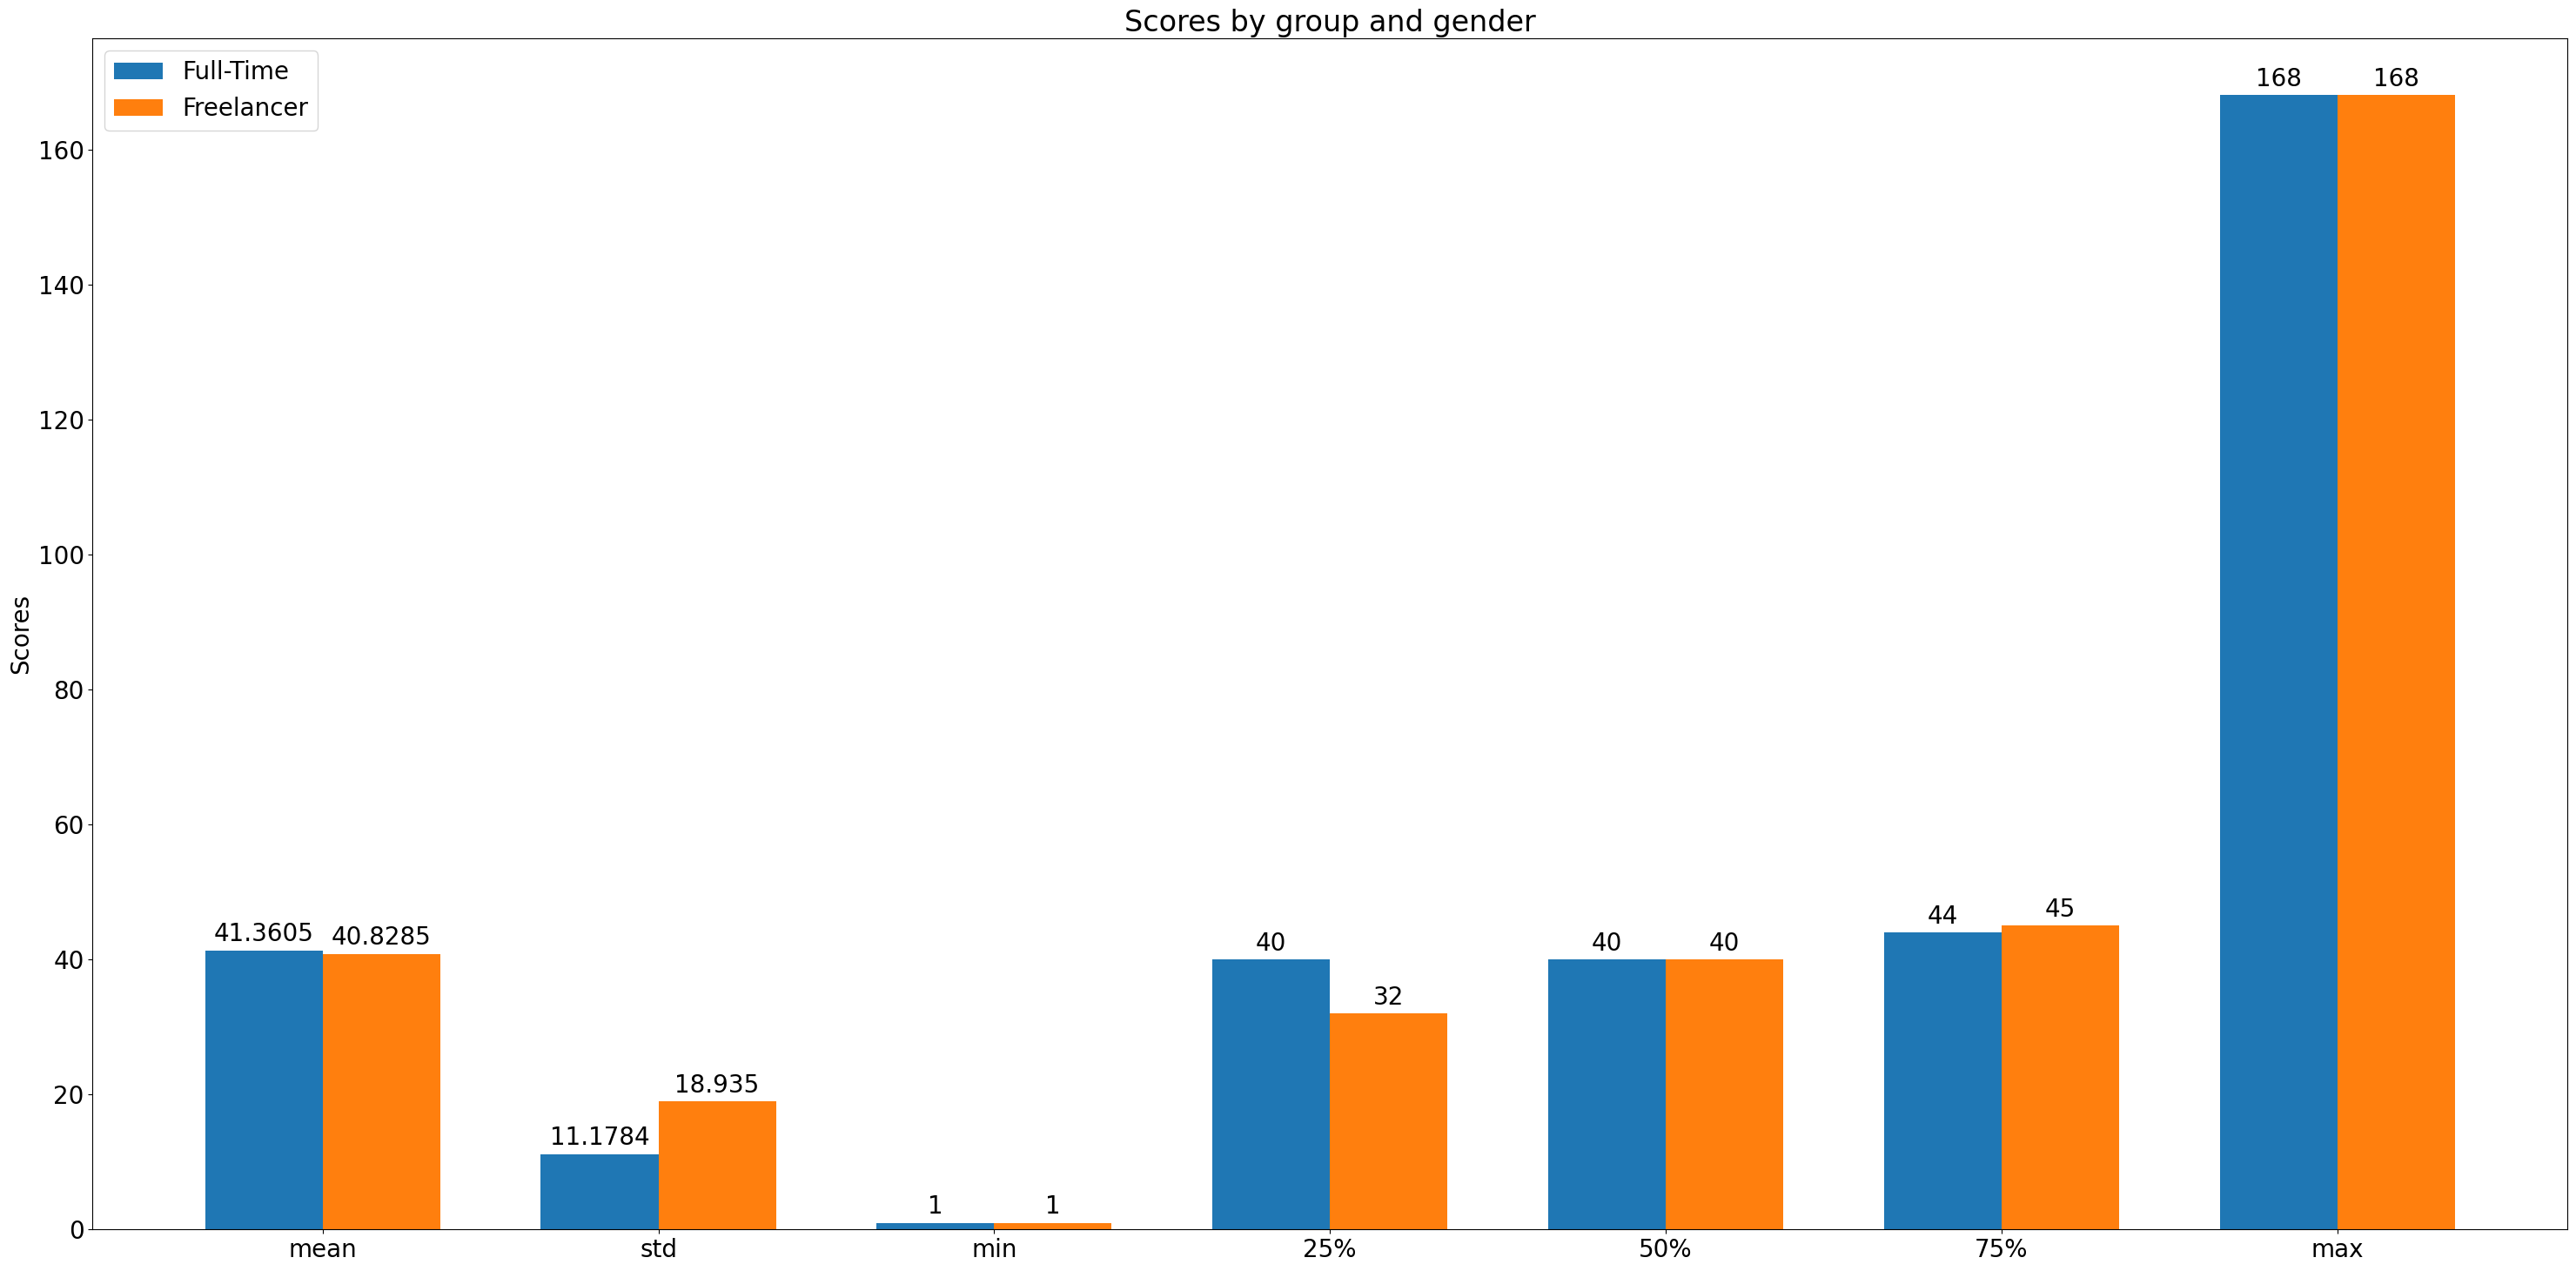

In [452]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(freelancer[1:]))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fulltime[1:], width, label='Full-Time')
rects2 = ax.bar(x + width/2, freelancer[1:], width, label='Freelancer')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, fulltime[1:].index)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [464]:
grp = df.groupby('Age1stCode')
df['LanguageWorkedWith']

62723    Assembly;Bash/Shell/PowerShell;Other(s):
50172              C#;HTML/CSS;JavaScript;SQL;VBA
39018      HTML/CSS;JavaScript;PHP;SQL;TypeScript
58082        Assembly;C;C++;HTML/CSS;Java;PHP;SQL
7056                      HTML/CSS;JavaScript;PHP
                           ...                   
88873                                         NaN
88874                                         NaN
88879                                         NaN
88880                                         NaN
88881                                         NaN
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [467]:
grp['LanguageWorkedWith'].apply(countlang)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_2904\2664829848.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(List).value_counts().sort_values(ascending=False)
C:\Users\mahmo\AppData\Local\Temp\ipykernel_2904\2664829848.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(List).value_counts().sort_values(ascending=False)
C:\Users\mahmo\AppData\Local\Temp\ipykernel_2904\2664829848.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(List).value_counts().sort_values(ascending=False)
C:\Users\mahmo\AppData\Local\Temp\ipykernel_2904\2664829848.py:12: FutureWarning: The default dtype for empty

Age1stCode                                 
10                    JavaScript               3460
                      HTML/CSS                 3176
                      SQL                      2736
                      Python                   2464
                      Bash/Shell/PowerShell    2360
                                               ... 
Younger than 5 years  Elixir                     23
                      Scala                      23
                      Erlang                     21
                      Dart                       20
                      F#                         18
Name: LanguageWorkedWith, Length: 1255, dtype: int64